##**Task Description: Predictive Analysis of Bike Rental Data**

1. **Import Necessary Libraries:**
   - Begin by importing the required Python libraries for data analysis and visualization.

2. **Import Dataset:**
   - Fetch the dataset from the following URL: https://gitlab.com/codedeploycloud/data_science/-/raw/main/datasets/bike.csv.
   - Load the dataset into your Python environment for further analysis.
3. **Explore dataset with different methods ahd plots.

11. **Linear Regression Modeling:**
    - Apply linear regression to the entire dataset, using "total_count" as the response variable and "hour" and "workingday" as features.
    - Print the coefficients and interpret them. Discuss the limitations of linear regression in this context.

12. **10-Fold Cross-Validation for Linear Regression:**
    - Use 10-fold cross-validation to calculate the Root Mean Squared Error (RMSE) for the linear regression model.
    - Follow the provided link for scikit-learn documentation: https://scikit-learn.org/stable/modules/cross_validation.html

13. **Convert MSE to RMSE and Calculate Mean RMSE:**
    - Transform Mean Squared Error (MSE) into RMSE and compute the average of the 10 RMSE scores.

14. **Decision Tree Modeling:**
    - Evaluate a decision tree model using 10-fold cross-validation with the same features.
    - Compare the decision tree model using "max_depth = 3" with the entire dataset, creating a tree diagram with Graphviz.
    - Explain the significance of each leaf and highlight what insights the decision tree gained that the linear regression model might have missed.

15. **Generate Graphviz File:**

##Import required libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz


##Download url and create df.
downloads data from a specified URL and creates a DataFrame named 'bike'. It then prints key details such as shape, column names, and the first few rows of the DataFrame.

In [4]:
url = "https://gitlab.com/codedeploycloud/data_science/-/raw/main/datasets/bike.csv"

bike = pd.read_csv(url, index_col = "datetime", parse_dates=True)

print(bike.head())

                     season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  
datetime                                                             
2011-01-01 00:00:00        81        0.0       3          13     16  
2011-01-01 01:00:00        80        0.0       8          32     40  
2011-01-01 02:00:00        80        0.0       5          27     32  
2011-01-01 03:00:00        75        0.0       3          10     13  
2011-01-01 04:00:00        75        0.0       0      

###Renaming
*   Renaming the 'count' column to 'total_count' for
clarity, distinguishing it from potential reserved names
* Creating a new 'hour' column based on the index hour. The 'hour' column provides a specific time-based feature derived from the index, aiding in time-based analysis and facilitating insights into hourly patterns in bike data.



In [5]:
bike.rename(columns={'count': "total_count"}, inplace= True)
print(bike.head())

                     season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  total_count  
datetime                                                                   
2011-01-01 00:00:00        81        0.0       3          13           16  
2011-01-01 01:00:00        80        0.0       8          32           40  
2011-01-01 02:00:00        80        0.0       5          27           32  
2011-01-01 03:00:00        75        0.0       3          10           13  
2011-01-01 04:00:0

In [6]:
#hour column "hour" column ranges from 0 (midnight) to 23 (23:00)
bike["hour"]=bike.index.hour


### Exploring the dataset using:head, tail, and describe methods
*  head(), tail()
*  info(), shape
*  isnull(), isna()
*  describe()
A quick exploration of the 'bike' dataset, displaying the first and last 5 rows to showcase its structure and utilizing the describe method to present summary statistics, giving insights into the distribution and characteristics of the data.

In [7]:
bike.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  total_count  \
datetime                                                                    
2011-01-01 00:00:00        81        0.0       3          13           16   
2011-01-01 01:00:00        80        0.0       8          32           40   
2011-01-01 02:00:00        80        0.0       5          27           32   
2011-01-01 03:00:00        75        0.0       3          10           13   
2011-01-01 04:00:00        75        0.0       0           1            1   

                     hour  
datetime                   
2011-01-01 00:00:00     0  
2011-01-01 01:00:00     1  
2011-01-01 02:00:00     2  
2011-01-01 03:00:00     3  
2011-01-01 04:00:00     4

from matplotlib import pyplot as plt
_df_0['temp'].plot(kind='hist', bins=20, title='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['atemp'].plot(kind='hist', bins=20, title='atemp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['humidity'].plot(kind='hist', bins=20, title='humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['casual'].plot(kind='hist', bins=20, title='casual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='temp', y='atemp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='atemp', y='humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='humidity', y='casual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='casual', y='registered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['season']
  ys = series['temp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('season', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('season')
_ = plt.ylabel('temp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['season']
  ys = series['atemp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('season', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('season')
_ = plt.ylabel('atemp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['season']
  ys = series['humidity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('season', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('season')
_ = plt.ylabel('humidity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['season']
  ys = series['casual']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('season', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('season')
_ = plt.ylabel('casual')

from matplotlib import pyplot as plt
_df_12['temp'].plot(kind='line', figsize=(8, 4), title='temp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['atemp'].plot(kind='line', figsize=(8, 4), title='atemp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['humidity'].plot(kind='line', figsize=(8, 4), title='humidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['casual'].plot(kind='line', figsize=(8, 4), title='casual')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
bike.tail()

In [8]:
bike.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

        total_count          hour  
count  10886.000000  10886.000000  
mean     191.574132     11.541613  
std      181.144454      6.915838  
min        1.000000      0.000000  
25%       42.000000      6.000000  
50%      145.000000     12.000000  
75%      284.000000     18.000000  
max      977.000000     23.000000

from matplotlib import pyplot as plt
_df_16['season'].plot(kind='hist', bins=20, title='season')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['holiday'].plot(kind='hist', bins=20, title='holiday')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['workingday'].plot(kind='hist', bins=20, title='workingday')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['weather'].plot(kind='hist', bins=20, title='weather')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='season', y='holiday', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='holiday', y='workingday', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='workingday', y='weather', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='weather', y='temp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['season'].plot(kind='line', figsize=(8, 4), title='season')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['holiday'].plot(kind='line', figsize=(8, 4), title='holiday')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['workingday'].plot(kind='line', figsize=(8, 4), title='workingday')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['weather'].plot(kind='line', figsize=(8, 4), title='weather')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int64  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int64  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   casual       10886 non-null  int64  
 9   registered   10886 non-null  int64  
 10  total_count  10886 non-null  int64  
 11  hour         10886 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.1 MB


In [ ]:
bike.isnull().sum()

season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
total_count    0
hour           0
dtype: int64

In [ ]:
bike.isna().sum()

season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
total_count    0
hour           0
dtype: int64

##Run the groupby("workingday")
statement to compare with the total column and explain the result. Execute the groupby("hour") statement to compare with the total column and Execute the groupby("workingday") statement to compare with the total column and explain the result. Execute the groupby("hour") statement to compare with the total column and explain the result.

In [9]:
#column "workingday" = 1 or 0 if its holiday
grouped_by_workingday = bike.groupby("workingday")["total_count"].sum()
grouped_by_hour = bike.groupby("hour")["total_count"].sum()
print(grouped_by_workingday)
print(grouped_by_hour)

workingday
0     654872
1    1430604
Name: total_count, dtype: int64
hour
0      25088
1      15372
2      10259
3       5091
4       2832
5       8935
6      34698
7      96968
8     165060
9     100910
10     79667
11     95857
12    116968
13    117551
14    111010
15    115960
16    144266
17    213757
18    196472
19    143767
20    104204
21     79057
22     60911
23     40816
Name: total_count, dtype: int64


<Axes: xlabel='hour'>

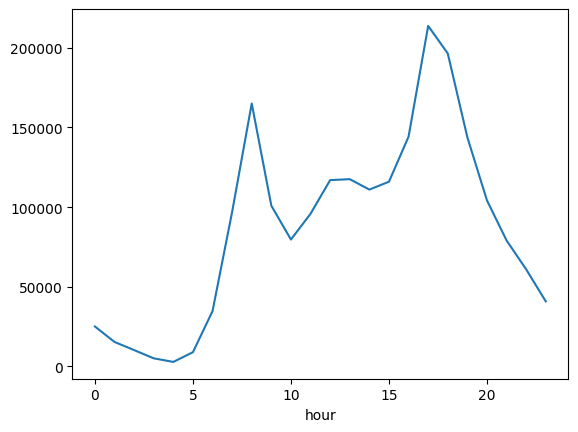

In [ ]:
grouped_by_hour.plot()

In [ ]:
bike.groupby("workingday").total_count.mean()

workingday
0    188.506621
1    193.011873
Name: total_count, dtype: float64

<Axes: xlabel='hour'>

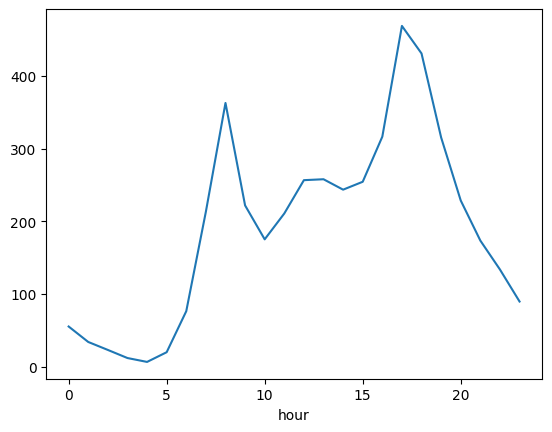

In [ ]:
bike.groupby("hour").total_count.mean().plot()

###plot some grafs
Plot a graph, x axis is hour, y axis is total. Then build a graph and divide this section into two separate sections with the condition “workingday”, provided that the x axis is hour, y is total

Plot the schedule and hourly rental for "workingday = 1" Plot the schedule for hourly rental for "workingday = 1" and "workingday = 0"

<Axes: xlabel='hour'>

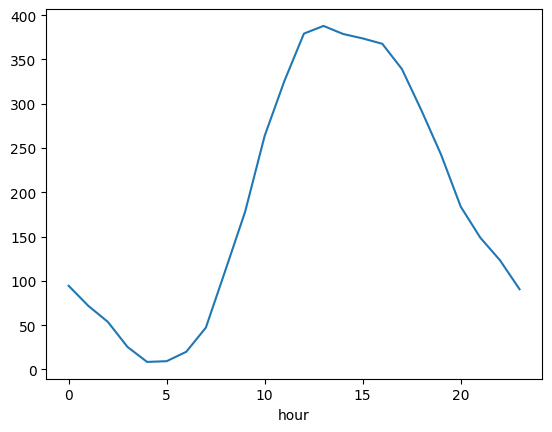

In [ ]:
bike[bike.workingday == 0].groupby("hour").total_count.mean().plot()

<Axes: xlabel='hour'>

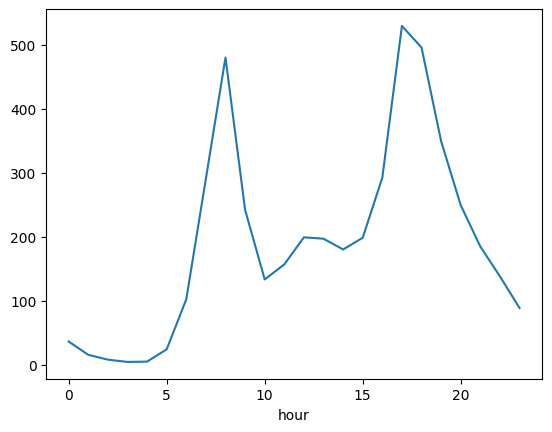

In [ ]:
bike[bike.workingday == 1].groupby("hour").total_count.mean().plot()

<Axes: xlabel='hour'>

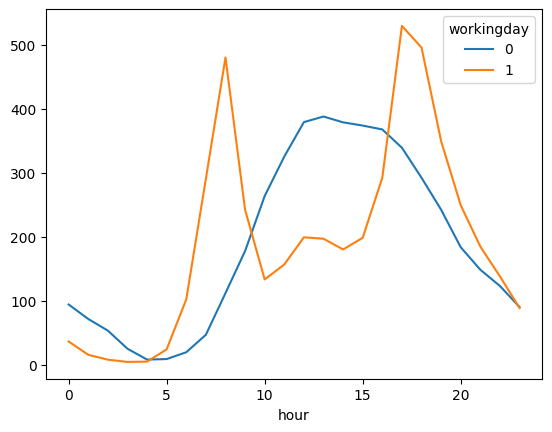

In [ ]:
bike.groupby(["hour", "workingday"]).total_count.mean().unstack().plot()

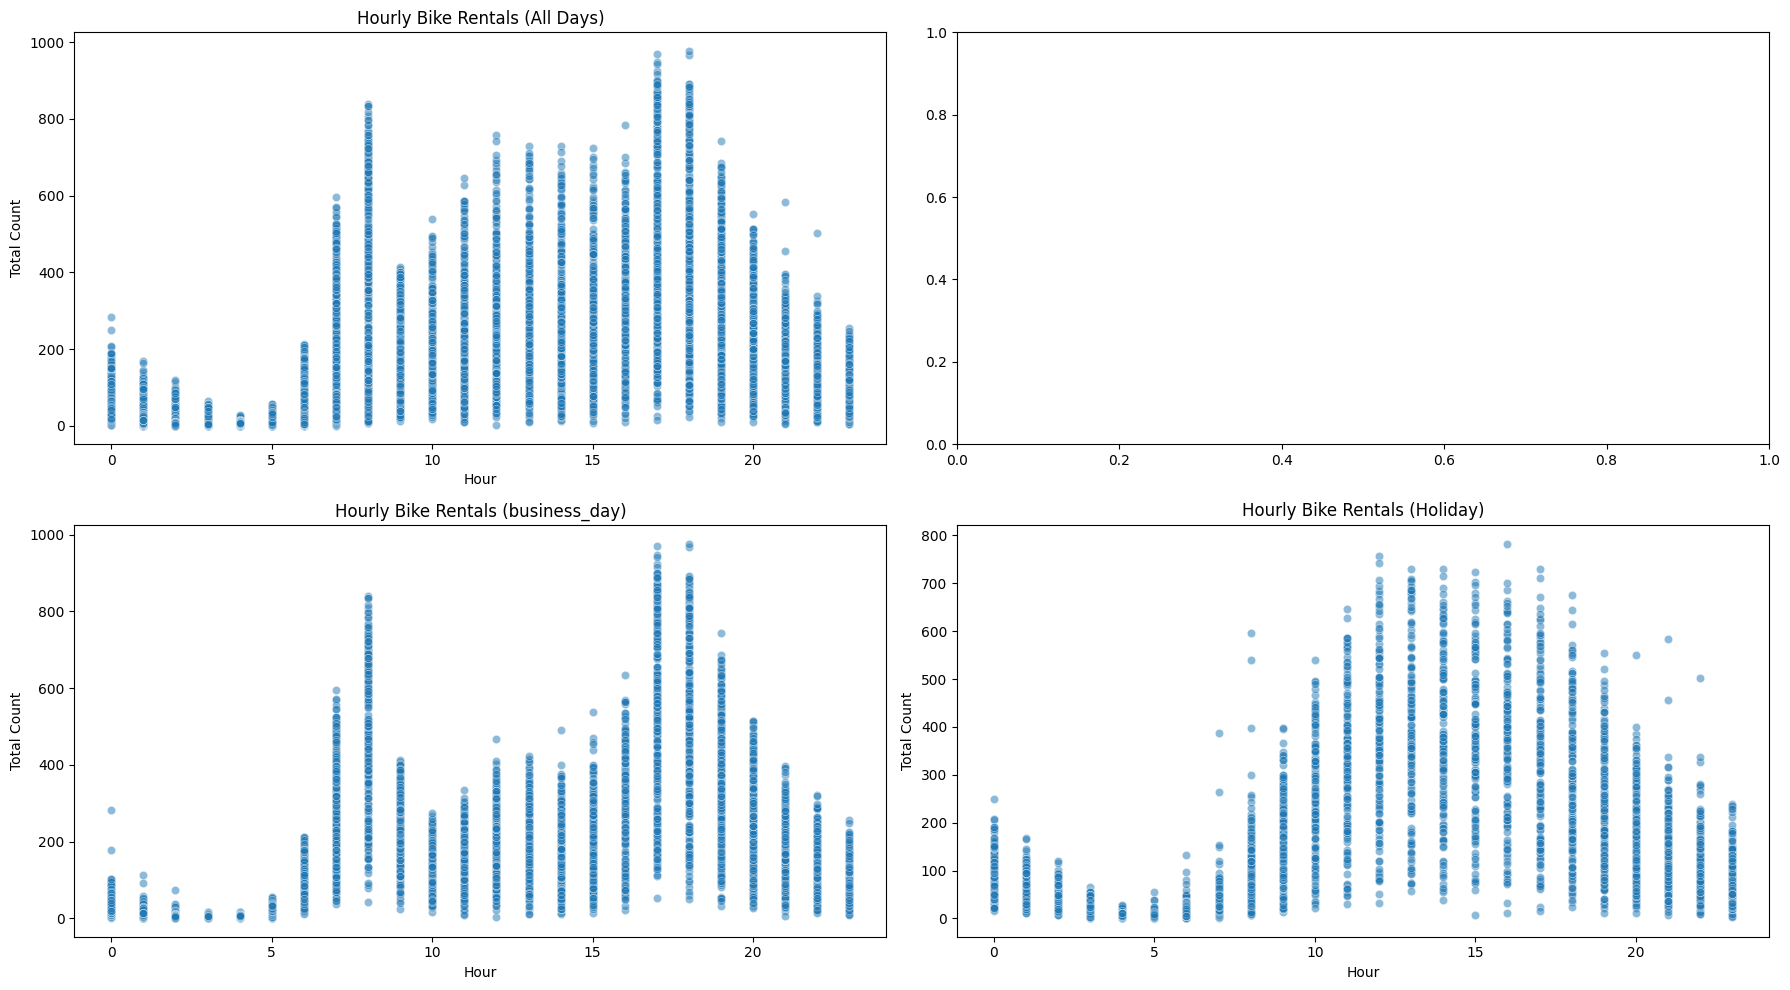

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

#graf 1: Hourly rental for all days
sns.scatterplot(data=bike, x='hour', y='total_count', alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Total Count')
axes[0, 0].set_title('Hourly Bike Rentals (All Days)')

# Graph 2: Hourly rental for "workingday = 1"
sns.scatterplot(data=bike[bike['workingday'] == 1], x='hour', y='total_count', alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Total Count')
axes[1, 0].set_title('Hourly Bike Rentals (business_day)')

# Graph 3: Hourly rental for "workingday = 0"
sns.scatterplot(data=bike[bike['workingday'] == 0], x='hour', y='total_count', alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Total Count')
axes[1, 1].set_title('Hourly Bike Rentals (Holiday)')

plt.tight_layout()
plt.show()




##linear regression model
*  Linear regression is used when there is a linear relationship between the dependent variable and the independent variables. In the context of predicting bike counts ("total_count") based on "hour" and "workingday," linear regression assumes that changes in these features have a constant effect on the bike count.
* Fit a linear regression model to the entire data set, using "total_count" as the answer and "hour" and "workingday" as the only features. Then print out the odds and interpret them.




In [12]:
X = bike[['hour', 'workingday']]
y = bike['total_count']
lin_reg = LinearRegression()
lin_reg.fit(X, y)

coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': lin_reg.coef_})
print(coefficients)



      feature  coefficient
0        hour    10.492063
1  workingday     4.072486


###Explanation
In this linear regression model, the coefficients represent the impact of each feature on the total bike count. For the 'hour' feature, a coefficient of 10.49 indicates that, on average, each additional hour contributes approximately 10.49 bikes to the total count. Similarly, for 'workingday,' the coefficient of 4.07 suggests that, on average, the bike count increases by about 4.07 on working days compared to non-working days. So, if it's a working day, you can expect an additional 4 bikes, and each hour contributes around 10 bikes to the total count, according to this model.


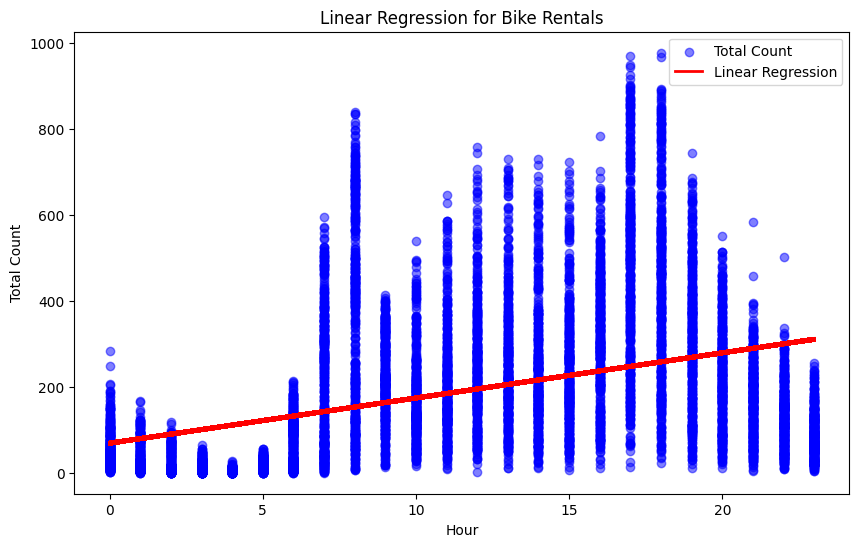

In [13]:

plt.figure(figsize=(10, 6))
plt.scatter(X['hour'], y, c='blue', alpha=0.5, label='Total Count')
plt.plot(X['hour'], lin_reg.predict(X), color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Hour')
plt.ylabel('Total Count')
plt.title('Linear Regression for Bike Rentals')
plt.legend()
plt.show()

###Interpretation:

The coefficient for "hour" means how much the bike rental increases as the hour increases.
The coefficient for "workingday" means how much the bike rental increases on weekdays
compared to weekends and holidays..
* Limitations:

Linear regression assumes a linear relationship, which might not capture complex, non-linear patterns in the data.
It is sensitive to outliers that can disproportionately influence the model.
It assumes homoscedasticity (constant variance of errors), which may not hold in all cases.
Categorical features like "workingday" may not be well-suited for linear regression without encoding techniques.
Linear regression may not handle interactions or multicollinearity well.








###cross-validation
Uses 10-fold cross-validation to calculate the Root Mean Squared Error (RMSE) for the linear regression model, providing an average performance measure across multiple folds..
https://scikit-learn.org/stable/modules/cross_validation.html


In [14]:
rmse_scores = np.sqrt(-cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=10))

print("Mean RMSE:", np.mean(rmse_scores))

Mean RMSE: 165.22328668912974


###Explanation of result
The Mean Root Mean Squared Error (RMSE) of 165.22 is a measure of how well the linear regression model predicts the total bike count. In simpler terms, it indicates that, on average, the predicted bike counts deviate by approximately 165.22 bikes from the actual counts. This metric is like evaluating how close the model's bike count predictions are to the real counts, with lower values signifying better predictive accuracy.


###Decision tree and cross-validation
Fit the decision tree model to the entire data set using "max_depth=3" and create a tree diagram using Graphviz. Explain what each leaf represents. What did the decision tree learn that the linear regression model couldn't?

In [20]:
from sklearn.tree import DecisionTreeRegressor


# Fit decision tree model
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X, y)

# Cross-validation with decision tree
cv_rmse = cross_val_score(tree_model, X, y, scoring='neg_root_mean_squared_error', cv=10).mean()
cv_rmse

-136.77375465075121

###Explanation about Decision Tree:
Each leaf in the decision tree represents a specific prediction or outcome. For regression, the leaf value typically corresponds to the mean target value of the samples in that leaf.
The decision tree learns complex, non-linear relationships in the data, capturing interactions between features. It excels at handling categorical variables and uncovering intricate patterns.
Cross-validation assesses the model's performance across multiple folds, providing a robust evaluation of its generalization to new data.
The decision tree can capture non-linear relationships and interactions between features that linear regression may overlook, making it valuable for understanding complex patterns in the dataset.

In [ ]:
!dot -Tpng tree_bike.dot -o tree_bike.png
!ls -la

total 96
drwxr-xr-x 1 root root  4096 Nov 21 23:56 .
drwxr-xr-x 1 root root  4096 Nov 21 23:39 ..
drwxr-xr-x 4 root root  4096 Nov 20 14:39 .config
drwxr-xr-x 1 root root  4096 Nov 20 14:42 sample_data
-rw-r--r-- 1 root root  1500 Nov 21 23:56 tree_bike.dot
-rw-r--r-- 1 root root 75030 Nov 21 23:56 tree_bike.png


In [ ]:
dot_data = export_graphviz(tree_model, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("bike_tree")

# Вывод древовидной диаграммы
graph.view("bike_tree")


###Conclusion about decision tree
Let's train a decision tree model with the parameter max_depth=3. We'll create a tree diagram to visualize the obtained tree. After executing the code, you'll have a "bike_tree.pdf" file with the tree diagram. Opening it reveals the structure of the decision tree, allowing us to interpret each leaf.
Each leaf represents a predicted value for the target variable "total_count" based on the values of the features "hour" and "workingday." The leaves contain numerical values representing the average of the target variable in the corresponding node. For example, if "workingday" is 0 (weekend or holiday) and "hour" is 8, the decision tree predicts that the average number of rented bikes will be, for instance, 100.

Decision trees can capture complex relationships between features and the target variable that linear regression might miss. They excel at detecting nonlinear dependencies and interactions between features, making them more accurate in predicting the target variable in certain cases. However, decision trees are prone to overfitting if the tree depth is too large, leading to perfect fitting to the training data but poor generalization to new data. Therefore, finding optimal parameters for the tree is crucial for achieving the best performance.

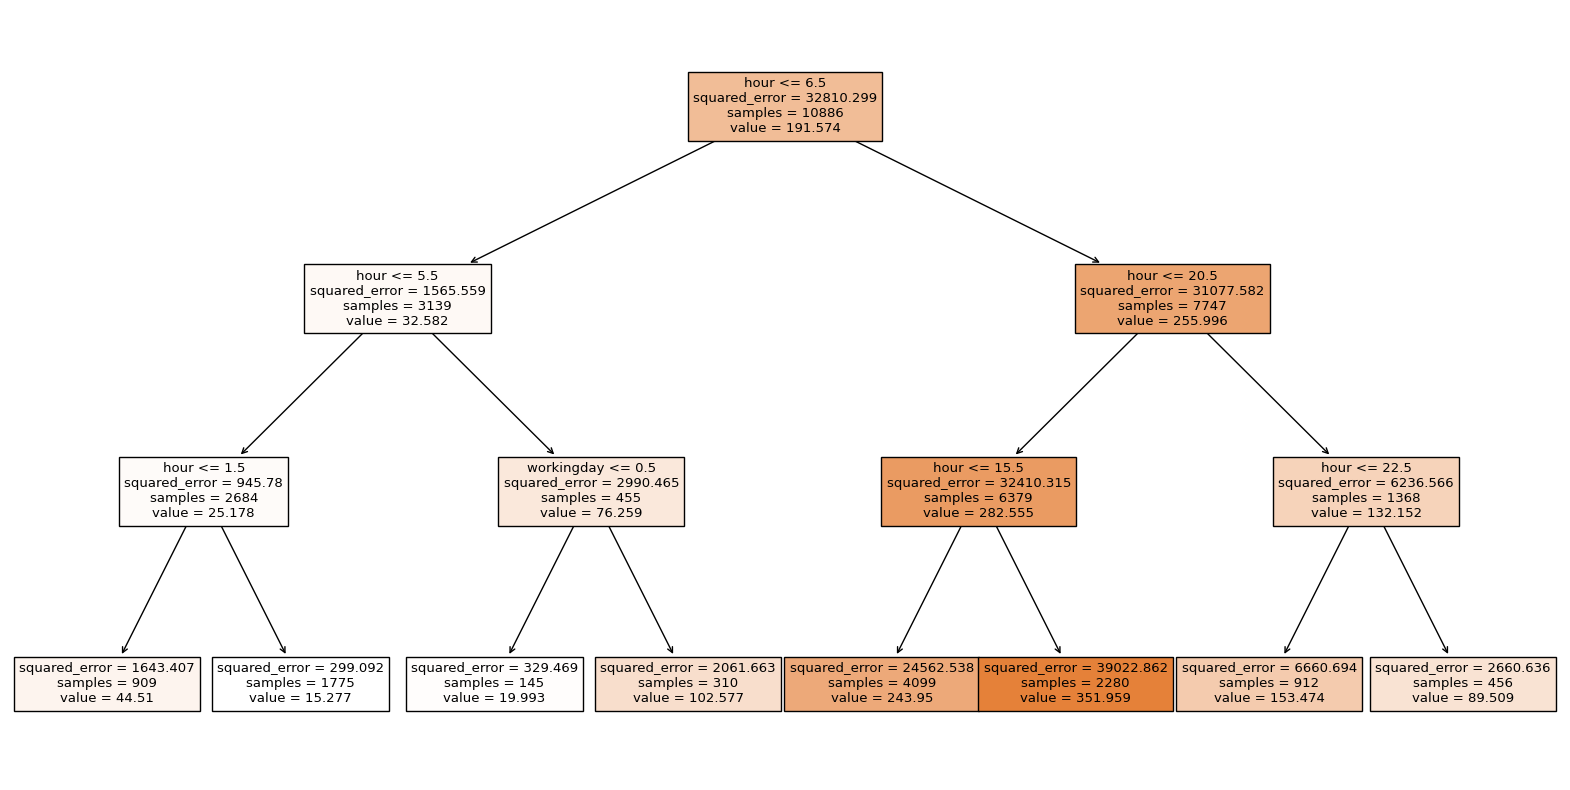

In [21]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns)
plt.show()

###Decision tree image explained
hour <= 1.5" is a condition or a split in the data based on the feature "hour." It indicates that this node represents instances where the value of "hour" is less than or equal to 1.5.

"sq error = 299, samples = 1775, values = 15.27" corresponds to the mean squared error, the number of samples, and the predicted value after the split. After the split based on the condition "hour <= 1.5,the model's predictions have an improved mean squared error of 299 for 1775 instances in this node, and the predicted average value for the target variable is 15.27.

This information is part of the decision tree's node representation, showing how the tree recursively makes splits to minimize prediction errors and create subsets of the data with more homogenous characteristics. It's essentially a snapshot of the decision-making process within the tree.








###Conclusion de Decision tree


1. Mean Squared Error (sq error = 299): This represents the average squared difference between the actual and predicted values for the target variable (total bike counts). In practical terms, a lower mean squared error indicates that the model's predictions are closer to the actual bike counts for the given subset of instances (samples).
2. Number of Samples (samples = 1775): This is the count of instances or observations falling into this particular node after the split. In this case, there are 1775 instances that meet the condition "hour <= 1.5."
3. Predicted Value (values = 15.27): This is the model's average prediction for the target variable within this node. For instances where "hour <= 1.5," the model predicts an average bike count of 15.27. Therefore, the we can interpret this as an estimated average number of bikes rented during specific hours based on the given condition.

In summary, after considering instances where the hour is less than or equal to 1.5, the model has refined its predictions, resulting in a lower prediction error, and it estimates that, on average, around 15.27 bikes are rented during these specific hours. This information can assist the owner in making more informed decisions about bike availability and business strategies during particular time periods.








##Conclusion total
The linear regression model yields a Mean Root Mean Squared Error (RMSE) of 165.22, reflecting an average deviation of approximately 165.22 bikes between predicted and actual counts. Lower RMSE values indicate enhanced predictive accuracy for total bike counts. The decision tree analysis focuses on instances where "hour <= 1.5," refining predictions with a Mean Squared Error of 299 for 1775 instances. This signifies improved alignment between predicted and actual bike counts during specific hours. The subset's predicted average bike count is 15.27, offering insights into expected rentals in these periods. This information aids the owner in optimizing bike availability and business strategies. The decision tree's capacity to capture nonlinear relationships enhances predictive capabilities, complementing linear regression. Integrating insights from both models provides a comprehensive understanding of factors influencing bike rental patterns, facilitating informed decision-making for the bike business.